## Problem 1

Temperature distribution at $t=0$ in a solid sphere of radius $R$ is given by

$$
T(r, t=0) = \frac{T_{0}}{2}\left( 1 - \text{cos}(\frac{\pi r}{R})\right).
$$

For $t>0$, the surface of the sphere (r=R) is insulated.


### A. ANALYTICAL SOLUTION

(a) By simple energy balance (no differential equations), argue what will be the final (as time goes to
infinity) temperature distribution in the sphere (both, profile as well as the quantitative value).

(b) Sketch $T(r, t)$ for 5 different values of time between 0 and infinity ($t = 0 < t_{1} < t_{2} < t_{3} < t_{4}$ ; over $0 <
r < R)$ to capture the temperature evolution. Be respectful of the magnitudes and slopes.

(c) Now solve for the temperature distribution in the sphere $T(r, t)$ analytically for $t > 0$

The heat conduction equation in sphericla coordinates is:

$$
\frac{1}{r^2} \frac{\partial}{\partial r} \left( r^2 \frac{\partial T}{\partial r}\right) = \frac{1}{\alpha}\frac{\partial T}{\partial t}
$$
where $\alpha$ is the thermal diffusivity of the material.

Boundary conditions are:  
(1) insulated surface @ $r=R$  
$$
\frac{\partial T}{\partial r}|_{r=R} = 0
$$

(2) Symmetry @ $r=0$  
$$
T(r=0, t) = \text{finite}
$$

Assume the temperature can be separated into functions of $r$ and $t$:
$$
T(r,t) = R(r)\Theta(t)
$$

Substituting this into the heat equation and deviding throughout by $R(r)\Theta(t)$:
$$
\frac{1}{\alpha \Theta}\frac{d\Theta}{dt} = \frac{1}{r^2 R}\frac{d}{dr}\left(r^2 \frac{dR}{dr} \right) \equiv - \lambda^2
$$
where the LHS is a function of $t$ only, and the RHS is a function of $r$ only. For this equation to be valid for all $r$ and $t$, both sides must be equal to a constant denoted as $-\lambda^2$.

(time-dependent part)
$$
\Theta(t) = e^{-\alpha \lambda^2 t}
$$

(radial part)
$$
\frac{1}{r^2}\frac{d}{dr}\left(r^2 \frac{dR}{dr} \right) + \lambda^2 R(r) = 0
$$

boundary conditions
$$
\frac{dR}{dr}|_{r=0} = 0 
$$
and
$$
\frac{dR}{dr}|_{r=R} = 0
$$

The solution to the radial part of the differential equation is:
$$
R(r) = A \frac{\sin (\lambda r)}{r}
$$

Consider the eigenvalues $\lambda_{n}$, and they are determined from the boundary condition at $r=R$:
$$
\frac{d}{dr}\left( \frac{sin(\lambda r)}{r} \right)|_{r=R} = 0
$$

Expanding the derivative:
$$
\cos (\lambda R) - \frac{\sin (\lambda R)}{R} = 0
$$

The solutions $\lambda_{n}$ to this equation are determined by the intersections of the functions $\cos(\lambda R)$ and $\sin (\lambda R)/R$.

Reconstruct the temperature distribution $T(r, t)$:
$$
T(r,t)  = \sum_{n=1}^{\infty} a_{n} \frac{\sin (\lambda_{n}r)}{r} e^{-\alpha \lambda_{n}t}
$$

To find the constants $a_{n}$, utilize the initial condition and orthogonarity:
$$
\int_{r=0}^{R} T(r,0) \frac{\sin(\lambda_{n}r)}{r}r^2 dr = a_{n} \int_{r=0}^{R}\left( \frac{\sin(\lambda_n r)}{r} \right)^2 r^2dr
$$

Therefore,
$$
a_{n} = \frac{1}{N_{n}^2}\int_{r=0}^{R} T(r,0) \frac{\sin(\lambda_{n}r)}{r}r^2 dr
$$
where
$$
N_{n}^{2} \equiv \int_{r=0}^{R}\left( \frac{\sin(\lambda_n r)}{r} \right)^2 r^2dr
$$

We want to study the characteristics of the analytical series solution (eigenvalues, number of terms needed for convergence at different $t_i$, etc).

(a) Evaluate the temperature $T(r, t)$, using the analytical solution obtained above for $t_0 = 0 < t_1 < t_2 < t_3 < t_4 < t_5 < t_6$ , selecting $t_i$ to adequately capture the entire transient. Carry out (i) through (vi). (30 points)

Obtain the enginvalues numerically:
$$
\cos(\lambda_{n} R) - \frac{\lambda_{n}R}{R} = 0
$$

In [9]:
import numpy as np
from scipy.optimize import fsolve

def equation(lam, R):
    return np.tan(lam * R) - R

def find_eigenvalues(R, n_values):
    # Initial guesses for root finding, based on odd-integer multiples of pi/2
    initial_guesses = [(2*n - 1) * np.pi / 2 for n in n_values]
    
    eigenvalues = []
    for guess in initial_guesses:
        lam_n = fsolve(equation, guess, args=(R))
        eigenvalues.append(lam_n[0])
    
    return eigenvalues

R_value = 1  # For example
n_values = range(1, 6)  # Finding first 5 eigenvalues
eigenvalues = find_eigenvalues(R_value, n_values)
print(eigenvalues)


[1.5707963502015858, 4.712389050604758, 7.853981751007929, 10.9955744514111, 14.137167151814271]


In [10]:
import numpy as np
import matplotlib.pyplot as plt


def initial_temperature(r, R, T0):
    """Compute the initial temperature distribution."""
    return (T0 / 2) * (1 - np.cos(np.pi * r / R))

def steady_state_temperature(T0):
    """Compute the steady-state temperature."""
    return (1/2 * T0) + (3 * T0 / (np.pi**2))

def compute_Nn_square(r, lam_n):
    """Compute the normalization factor N_n^2."""
    integrand = (np.sin(lam_n * r) / r)**2 * r**2
    return np.trapz(integrand, r)

def compute_an(r, R, T0, lam_n):
    """Compute the normalized coefficient a_n."""
    Nn_square = compute_Nn_square(r, lam_n)
    integrand = initial_temperature(r, R, T0) * np.sin(lam_n * r) / r * r**2
    return np.trapz(integrand, r) / Nn_square

def T_rt(r, t, R, T0, alpha, eigenvalues):
    """Compute the temperature distribution T(r,t)."""
    temperature = np.zeros_like(r)
    for lam_n in eigenvalues:
        an = compute_an(r, R, T0, lam_n)
        temperature += an * (np.sin(lam_n * r) / r) * np.exp(-alpha * lam_n**2 * t)
    return temperature

def plot_temperature_profiles(r, R, T0, alpha, eigenvalues, time_values):
    """Plot temperature profiles for a series of time values."""
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    #plt.axhline(y=steady_state_temperature(T0), color='gray', linestyle='--', label='Steady-State')
    for t in time_values:
        if t == 0:
            temperature_distribution = initial_temperature(r, R, T0)
        else:
            temperature_distribution = T_rt(r, t, R, T0, alpha, eigenvalues)
        plt.plot(r, temperature_distribution, label=f't = {t}')
    ax.set_title("Temperature Distribution T(r,t) n=5")
    ax.set_xlabel("Radius r")
    ax.set_ylabel("Temperature T(r,t)")
    ax.set_xlim(0, R)
    ax.legend()
    ax.grid(True)
    plt.show()

### Part (I)
For each t ($t = t_0, t_1,… t_6$), estimate how many terms in the series solution are necessary to assure
reasonable convergence.

(answer)  
- For each time $t$, I defined the following values: $t_0 = 0, t_1 = 10^{-2}, t_2 = 2 \times 10^{-2}, t_3 = 3 \times 10^{-2}, t_4 = 4 \times 10^{-2}, t_5 = 5 \times 10^{-2}$ and $t_{6} = 6 \times 10^{-2}$.
- The eivenvalues obtaned in the previous analysis are employed: [1.5707963502015858, 4.712389050604758, 7.853981751007929, 10.9955744514111, 14.137167151814271]
- Thermal diffusivity $\alpha = 1$

The temperature distribution at a given time $t$ using $n$ modes can be expressed:
$$
T_{n}(r,t) = \sum_{i=1}^{n} a_{i} \frac{\sin(\lambda_{i}r)}{r}e^{-\alpha \lambda_{i}^{2}t}
$$
Then, compute the temperature distribution for $n+1$ modes:
$$
T_{n+1}(r,t) = T_{n}(r,t) + a_{n+1} \frac{\sin(\lambda_{n+1}^{2}r}{r})e^{-\alpha \lambda_{n+1}^{2}t}
$$
The error estimation function is defined by:
$$
\Delta T(r,t) = |T_{n+1}(r,t) - T_{n}(r,t)| < \epsilon
$$

In this problem, the convergence value $\epsilon = 10^{-3}$ was employed.

In [11]:
# input variables
time_values = [0, 10**-2, 2* 10**-2, 3* 10**-2, 4* 10**-2, 5* 10**-2, 6*10**-2]
alpha_value = 1
T0_value = 1
r_values = np.linspace(0.001, R_value, 500)  # Avoid r=0 to prevent division by zero
eigenvalues_sample = [1.5707963502015858, 4.712389050604758, 7.853981751007929, 10.9955744514111, 14.137167151814271]

In [12]:
def estimate_terms_by_error(r, R, T0, alpha, eigenvalues, time_values, threshold=1e-3):
    """Estimate number of terms for convergence using Error Estimation method."""
    num_terms_required = []
    
    for t in time_values:
        prev_temperature = np.zeros_like(r)
        converged = False
        for i, lam_n in enumerate(eigenvalues):
            # Compute current temperature profile with i terms
            current_temperature = prev_temperature + compute_an(r, R, T0, lam_n) * \
                                  (np.sin(lam_n * r) / r) * np.exp(-alpha * lam_n**2 * t)
            
            # Compare with previous profile
            error = np.max(np.abs(current_temperature - prev_temperature))
            if error < threshold:
                converged = True
                num_terms_required.append(i)
                break
            
            prev_temperature = current_temperature
        
        # If not converged for any eigenvalue
        if not converged:
            num_terms_required.append(len(eigenvalues))
    
    return num_terms_required


In [13]:
# Estimate number of terms required for convergence for each time value using Error Estimation method
num_terms_estimates_error = estimate_terms_by_error(r_values, R_value, T0_value, alpha_value, eigenvalues, time_values)

# Display the estimates for the new time values
time_values, num_terms_estimates_error

([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06], [5, 5, 5, 4, 4, 3, 3])

### Part (II)
Show the impact of the number of terms kept in the series solution for each value of $t_i$ on a separate graph.  
(Plot $T(r, t_i)$ for increasingly larger number of terms kept in the series.).

(answer)

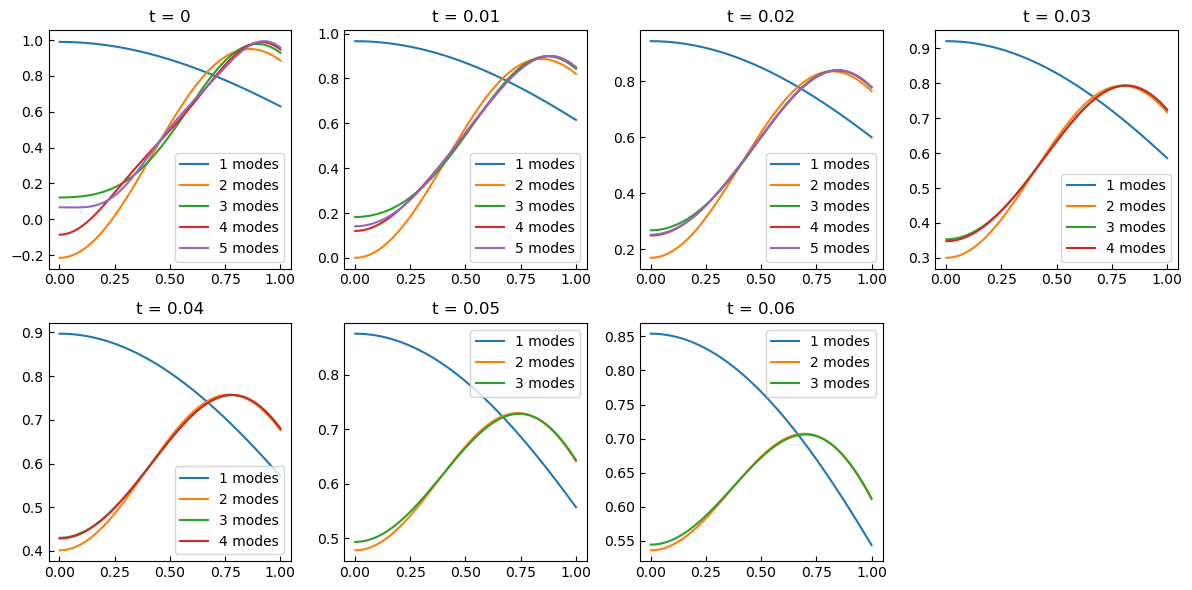

In [14]:
# Updated time values
time_values_all = [0, 10**-2, 2*10**-2, 3*10**-2, 4*10**-2, 5*10**-2, 6*10**-2]

# Create subplots
fig, axarr = plt.subplots(2, 4, figsize=(12, 6))
ax = axarr.flatten()

# For each time value, plot the temperature distribution with different number of modes
for i, (t, n_terms) in enumerate(zip(time_values_all, num_terms_estimates_error)):
    # For each mode up to n_terms, plot the temperature distribution
    for j in range(1, n_terms+1):
        temperature_distribution = T_rt(r_values, t, R_value, T0_value, alpha_value, eigenvalues_sample[:j])
        ax[i].plot(r_values, temperature_distribution, label=f'{j} modes')
    ax[i].set_title(f't = {t}')
    ax[i].legend()

# Remove the last unused subplot
ax[-1].axis('off')

plt.tight_layout()
plt.show()


### Part (III)
Report the summary for all cases in a table.

(answer)

The table contains 'time' and corresponding number of modes for convergence $\epsilon < 10^{-3}$.

In [21]:
import pandas as pd

report = pd.DataFrame()
report['Time'] = time_values
report['Modes'] = num_terms_estimates_error

report

,Time,Modes
0,0.00,5
1,0.01,5
2,0.02,5
3,0.03,4
4,0.04,4
5,0.05,3
6,0.06,3


### Part (IV)
Plot the converged $T(r, t_{i})$ as a function of $r (0 < r < R)$ for all seven cases on the same graph.

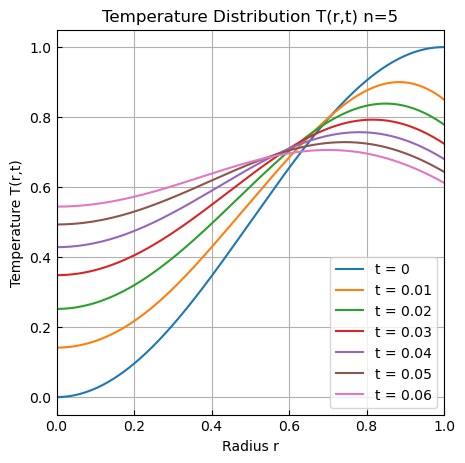

In [15]:
R_value = 1
T0_value = 1
alpha_value = 1
eigenvalues_sample = [1.5707963502015858, 4.712389050604758, 7.853981751007929, 10.9955744514111, 14.137167151814271]
r_values = np.linspace(0.001, R_value, 500)  # Avoid r=0 to prevent division by zero
time_values = [0, 10**-2, 2* 10**-2, 3* 10**-2, 4* 10**-2, 5* 10**-2, 6*10**-2]  # Sample time values for demonstration

# Plot the temperature profiles for the given time values
plot_temperature_profiles(r_values, R_value, T0_value, alpha_value, eigenvalues_sample, time_values)

### Part (V)
Tabulate your eigenvalues, and show all steps in an Appendix.

In [30]:
report_eigenvalues = pd.DataFrame()
report_eigenvalues['Mode'] = np.linspace(1,5, 5)
report_eigenvalues['Eigenvalues'] = eigenvalues_sample

report_eigenvalues

,Mode,Eigenvalues
0,1.0,1.570796
1,2.0,4.712389
2,3.0,7.853982
3,4.0,10.995574
4,5.0,14.137167
